In [1]:
import numpy as np
import matplotlib.pyplot as plt
from membership_functions import purchase_price, maintenance_price, doors, persons, luggage_space, safety
import evaluation

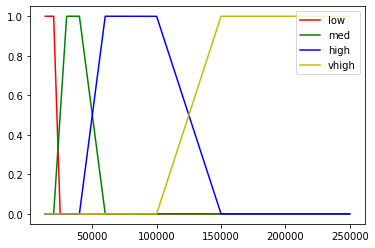

In [2]:
pprices = np.linspace(13_500, 250_000, 10_000)

low_membership = [purchase_price.f_low(x) for x in pprices]
med_membership = [purchase_price.f_med(x) for x in pprices]
high_membership = [purchase_price.f_high(x) for x in pprices]
vhigh_membership = [purchase_price.f_vhigh(x) for x in pprices]

plt.plot(pprices, low_membership, 'r', label='low')
plt.plot(pprices, med_membership, 'g', label='med')
plt.plot(pprices, high_membership, 'b', label='high')
plt.plot(pprices, vhigh_membership, 'y', label='vhigh')

plt.legend(loc='upper right')
plt.savefig('exports/purchase_price_membership_func.png')

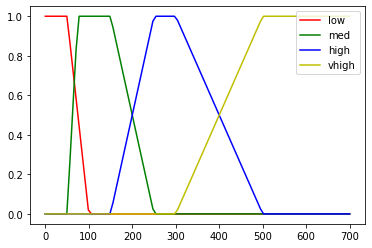

In [3]:
mprices = np.linspace(0, 700, 100)

low_membership = [maintenance_price.f_low(x) for x in mprices]
med_membership = [maintenance_price.f_med(x) for x in mprices]
high_membership = [maintenance_price.f_high(x) for x in mprices]
vhigh_membership = [maintenance_price.f_vhigh(x) for x in mprices]

plt.plot(mprices, low_membership, 'r', label='low')
plt.plot(mprices, med_membership, 'g', label='med')
plt.plot(mprices, high_membership, 'b', label='high')
plt.plot(mprices, vhigh_membership, 'y', label='vhigh')

plt.legend(loc='upper right')
plt.savefig('exports/maintentance_price_membership_func.png')

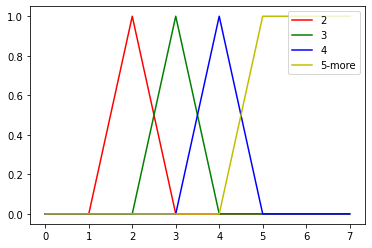

In [4]:
d = np.linspace(0, 7, 8)

two_membership = [doors.f_two(x) for x in d]
three_membership = [doors.f_three(x) for x in d]
four_membership = [doors.f_four(x) for x in d]
five_more_membership = [doors.f_five_more(x) for x in d]

plt.plot(d, two_membership, 'r', label='2')
plt.plot(d, three_membership, 'g', label='3')
plt.plot(d, four_membership, 'b', label='4')
plt.plot(d, five_more_membership, 'y', label='5-more')

plt.legend(loc='upper right')
plt.savefig('exports/doors_membership_func.png')

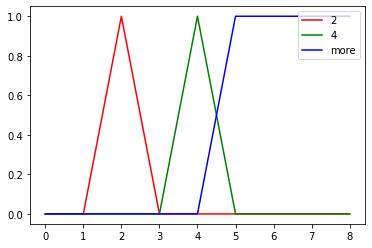

In [5]:
p = np.linspace(0, 8, 9)

two_membership = [persons.f_two(x) for x in p]
four_membership = [persons.f_four(x) for x in p]
more_membership = [persons.f_more(x) for x in p]

plt.plot(p, two_membership, 'r', label='2')
plt.plot(p, four_membership, 'g', label='4')
plt.plot(p, more_membership, 'b', label='more')

plt.legend(loc='upper right')
plt.savefig('exports/persons_membership_func.png')

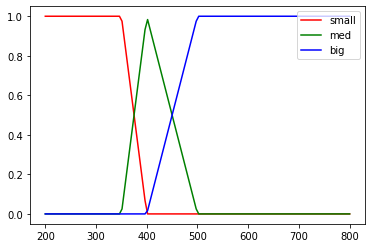

In [6]:
lspace = np.linspace(200, 800, 120)

small_membership = [luggage_space.f_small(x) for x in lspace]
med_membership = [luggage_space.f_med(x) for x in lspace]
big_membership = [luggage_space.f_big(x) for x in lspace]

plt.plot(lspace, small_membership, 'r', label='small')
plt.plot(lspace, med_membership, 'g', label='med')
plt.plot(lspace, big_membership, 'b', label='big')

plt.legend(loc='upper right')
plt.savefig('exports/luggage_space_membership_func.png')

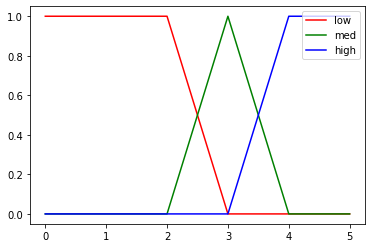

In [8]:
s = np.linspace(0, 5, 6)

low_membership = [safety.f_low(x) for x in s]
med_membership = [safety.f_med(x) for x in s]
high_membership = [safety.f_high(x) for x in s]

plt.plot(s, low_membership, 'r', label='low')
plt.plot(s, med_membership, 'g', label='med')
plt.plot(s, high_membership, 'b', label='high')

plt.legend(loc='upper right')
plt.savefig('exports/safety_membership_func.png')

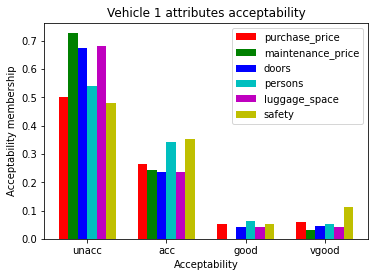

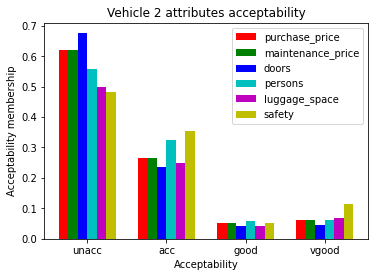

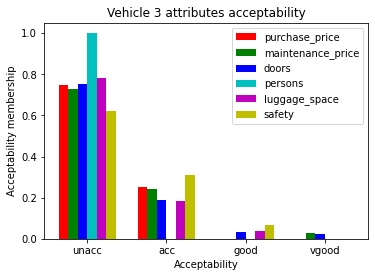

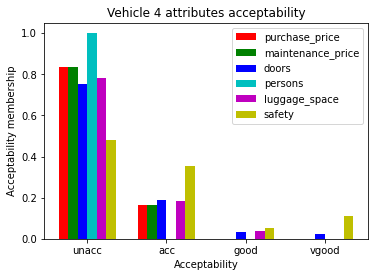

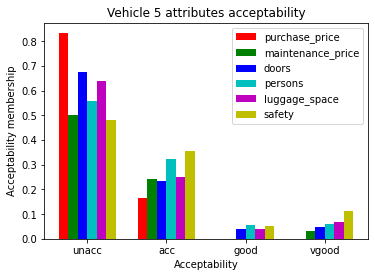

In [51]:
generator = evaluation.VehicleCompositionGenerator('data/car.data')
vehicle_params = np.array([
    [25_000, 250, 4, 4, 400, 4],
    [40_000, 150, 4, 5, 450, 5],
    [75_000, 350, 2, 2, 170, 3],
    [250_000, 700, 2, 2, 100, 4],
    [170_000, 400, 4, 5, 550, 5]
])

composition = generator.for_vehicle_parameters(vehicle_params).max_min_composition()

acceptability_literals = ['unacc', 'acc', 'good', 'vgood']
acceptability = np.arange(4)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
labels = ['purchase_price', 'maintenance_price', 'doors', 'persons', 'luggage_space', 'safety']

for v in range(len(vehicle_params)):
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.75,0.75])

    plt.xticks(acceptability, acceptability_literals)
    plt.xlabel('Acceptability')
    plt.ylabel('Acceptability membership')
    plt.title('Vehicle %i attributes acceptability' % (v + 1))

    for i, c in enumerate(composition):
        data = c[v]
        ax.bar(acceptability + (i-2.5) * 0.12, data, color=colors[i], width=0.12, label=labels[i])

    plt.legend()
    plt.savefig('exports/vehicle_%i_acceptability.png' % (v + 1))